In [1]:
# Import Packages
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
# Import functions
from my_functions import *

In [4]:
df_new = pd.read_csv('data/complete_data.csv')
# total number of cars 
N = len(df_new)
# value of cars varies
profit = df_new['Profit']
# size of the cars varies
size = df_new["size"]
# total size of all cars
total_size = np.sum(size)
# parking lot capacity
parkCapacity = 2*total_size/3

# Buying price for each car
buy_price = df_new["Buying Price"]
# total amount of buying cost
total_price = np.sum(buy_price)
# total budget the dealership has
dealBudget = total_price/4

# approximation with greedy algorithm
fuel = df_new["fuel_type"].values
imported = df_new["imported"].values
profit = df_new['Profit'].values
cost = df_new['Buying Price'].values

global value_per_size 
value_per_size = profit/size
global should_break
should_break=False

global items
items = []
global counter_import
counter_import = 0
global counter_EV
counter_EV = 0

EV_fee = 300
license_fee = 1000

##### When we emphasize on profit-size ratio:

In [6]:
greedy_size = ddog_size(items,fuel, imported, 
              value_per_size, 
              profit, EV_fee, license_fee, 
              size, cost, parkCapacity,dealBudget,
              counter_EV, counter_import, should_break)
infoPage(N, profit, sum(size), buy_price, parkCapacity, dealBudget)
runOG(greedy_size, profit, size, buy_price)
len(items)

Total Number of cars ready to sell:  3223
Total car value: $ 26420798.85
Total Size of cars:  28942 m^2
Total buying cost amount: $ 106834878.15
------------------------------------------
Parking Lot Capacity:  19294.666666666668 m^2
Available Budget Amount: $ 26708719.5375
---------------------------------------------------------------
Dealership Decision Optimizer Greedy System(D-DOGS) is optimizing....
---------------------------------------------------------------
140 cars sold
Profit: $ 7247149.25
Actual Size of cars sold:  1244 m^2
Actual budget spent: $ 26693793.75


140

In [14]:
unique_brands = df_new["brand"].unique()
unique_fuel = df_new["fuel_type"].unique()

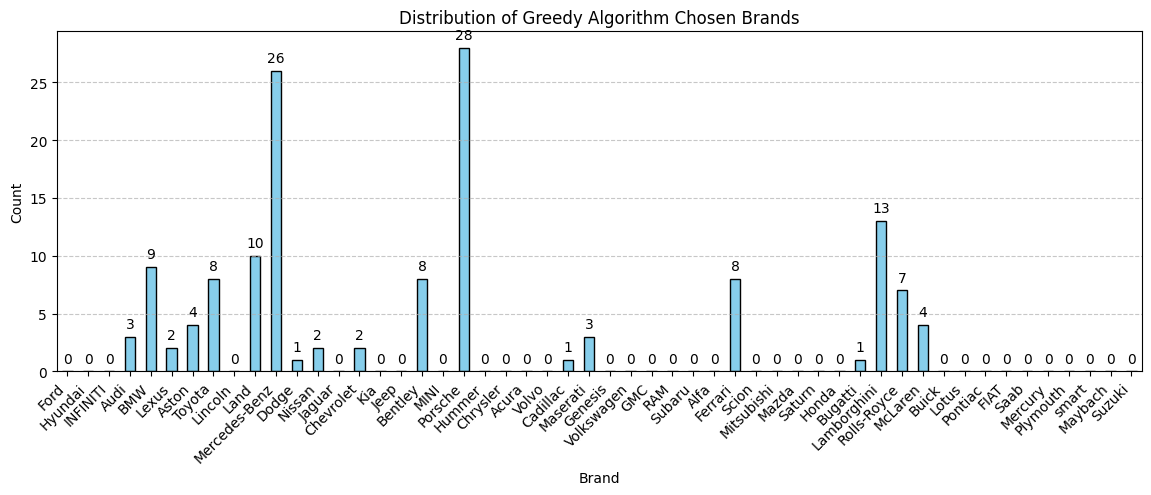

In [21]:
greedy_selected_brand = pd.Categorical(df_new.loc[items, "brand"], categories=unique_brands, ordered=True)      
brand_counts = pd.Series(greedy_selected_brand).value_counts().sort_index()
plt.figure(figsize=(14,5))
brand_counts.plot(kind="bar", color = "skyblue", edgecolor="black")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Distribution of Greedy Algorithm Chosen Brands")
plt.xticks(rotation=45, ha="right", fontsize=10)  # Reduce font size
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(bottom=0.2)  # Add padding to prevent label cutoff
for i, value in enumerate(brand_counts):
    plt.text(i,value +0.5, str(value), ha="center", va="bottom", fontsize=10)
plt.savefig("data/greedy_size_brand.png", dpi=300, bbox_inches="tight")
plt.show()

In [17]:
hybrid__profit = df_new[df_new['fuel_type'].isin(['Hybrid'])]['Profit'].mean()
plug_in_profit = df_new[df_new['fuel_type'].isin(['Plug-In Hybrid'])]['Profit'].mean()

# Calculate the mean profit for Gasoline cars
gasoline_profit = df_new[df_new['fuel_type'] == 'Gasoline']['Profit'].mean()

# Print the results
print("Mean profit for Hybrid or Plug-In Hybrid cars:", hybrid__profit)
print("Mean profit for Plug-In Hybrid cars:", plug_in_profit)
print("Mean profit for Gasoline cars:", gasoline_profit)

Mean profit for Hybrid or Plug-In Hybrid cars: 17037.463448275863
Mean profit for Plug-In Hybrid cars: 2188.136363636364
Mean profit for Gasoline cars: 8122.0924333925395


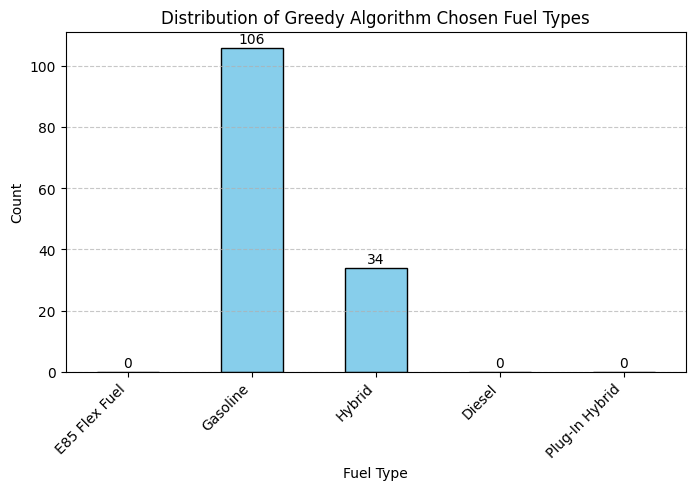

In [22]:
greedy_selected_fuel = pd.Categorical(df_new.loc[items, "fuel_type"], categories=unique_fuel, ordered=True)  
fuel_counts = pd.Series(greedy_selected_fuel).value_counts().sort_index()
plt.figure(figsize=(8,5))
fuel_counts.plot(kind="bar", color = "skyblue", edgecolor="black")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Distribution of Greedy Algorithm Chosen Fuel Types")
plt.xticks(rotation=45, ha="right", fontsize=10)  # Reduce font size
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.subplots_adjust(bottom=0.2)  # Add padding to prevent label cutoff
for i, value in enumerate(fuel_counts):
    plt.text(i,value +0.5, str(value), ha="center", va="bottom", fontsize=10)
plt.savefig("data/greedy_size_fuel.png", dpi=300, bbox_inches="tight")
plt.show()

In [19]:
import_profit = df_new[df_new['imported'] == 1]['Profit'].mean()

# Calculate the mean profit for Gasoline cars
non_import_profit = df_new[df_new['imported'] == 0]['Profit'].mean()

# Print the results
print("Mean profit for import cars:", import_profit)
print("Mean profit for domestic cars:", non_import_profit)

Mean profit for import cars: 7763.693885601577
Mean profit for domestic cars: 8585.323413631022


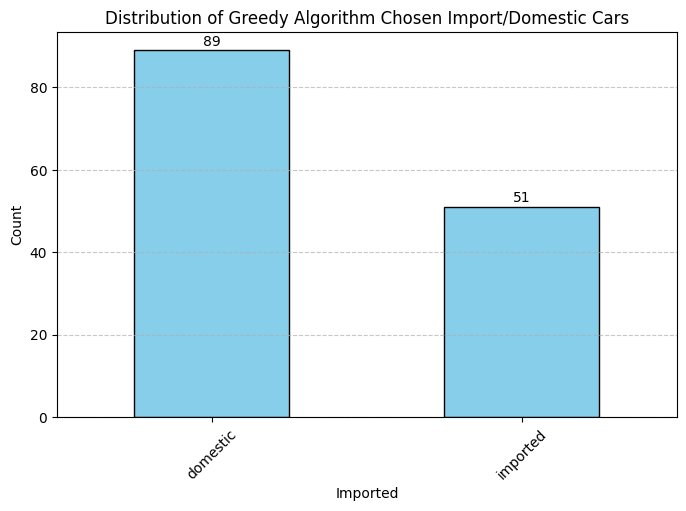

In [23]:
greedy_selected_import = df_new.loc[items, "imported"].map({0: 'domestic', 1: 'imported'})
import_counts = greedy_selected_import.value_counts()
plt.figure(figsize=(8,5))
import_counts.plot(kind="bar", color = "skyblue", edgecolor="black")
plt.xlabel("Imported")
plt.ylabel("Count")
plt.title("Distribution of Greedy Algorithm Chosen Import/Domestic Cars")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(import_counts):
    plt.text(i,value +0.5, str(value), ha="center", va="bottom", fontsize=10)
plt.savefig("data/greedy_size_import.png", dpi=300, bbox_inches="tight")
plt.show()